<a href="https://colab.research.google.com/github/lucas-C2025/machine-learning/blob/main/2_%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd

#url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/datasets/iris.data"
url1 = "/content/sample_data/winequality-red.csv"
url2 = "/content/sample_data/winequality-white.csv"

# Carregar base de dados
# DataFrame
dataset = pd.read_csv(url1, sep=';')

columns = len(dataset.columns)

y1 = dataset['quality'] # extrai a primeira coluna, que é o label
X1 = dataset.drop('quality', axis=1)

# Carregar base de dados de vinho branco
dataset_white = pd.read_csv(url2, sep=';')

# Separar features (X2) e target (y2) para vinho branco
X2 = dataset_white.drop('quality', axis=1)
y2 = dataset_white['quality']

#display(X1)

In [8]:
#dividindo os datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=None, stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=None, stratify=y2)

#Concatenando os dados

X_train_combined = pd.concat([X1_train, X2_train], ignore_index=True)
y_train_combined = pd.concat([y1_train, y2_train], ignore_index=True)


In [9]:
# Treinamendo da Árvore de Decisão
#model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
model_combined = tree.DecisionTreeClassifier(criterion="entropy")
model_combined.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier(criterion='entropy')

In [11]:
# Predição e Resultados

# Exemplo avaliando em vinho branco
result_white = model_combined.predict(X2_test)
acc_white = metrics.accuracy_score(result_white, y2_test)
print("Acurácia no teste de vinho branco (modelo combinado): {:.2f}%".format(acc_white * 100))

# Exemplo avaliando em vinho tinto
result_red = model_combined.predict(X1_test)
acc_red = metrics.accuracy_score(result_red, y1_test)
print("Acurácia no teste de vinho tinto (modelo combinado): {:.2f}%".format(acc_red * 100))


Acurácia no teste de vinho branco (modelo combinado): 57.65%
Acurácia no teste de vinho tinto (modelo combinado): 61.88%


[Text(0.48130694899611975, 0.98, 'x[10] <= 10.65\nentropy = 1.838\nsamples = 5197\nvalue = [24.0, 172.0, 1711.0, 2268.0, 863.0, 155.0, 4.0]'),
 Text(0.21885153401220608, 0.94, 'x[1] <= 0.235\nentropy = 1.587\nsamples = 3093\nvalue = [13.0, 119.0, 1449.0, 1265.0, 220.0, 26.0, 1.0]'),
 Text(0.3500792415041629, 0.96, 'True  '),
 Text(0.06363211232922122, 0.9, 'x[9] <= 0.475\nentropy = 1.615\nsamples = 830\nvalue = [2, 15, 190, 478, 124, 21, 0]'),
 Text(0.03340101342552033, 0.86, 'x[0] <= 6.55\nentropy = 1.742\nsamples = 420\nvalue = [1.0, 9.0, 119.0, 216.0, 55.0, 20.0, 0.0]'),
 Text(0.013259773163166245, 0.82, 'x[8] <= 3.235\nentropy = 1.363\nsamples = 134\nvalue = [0, 2, 56, 69, 6, 1, 0]'),
 Text(0.0068193119124854975, 0.78, 'x[8] <= 3.055\nentropy = 1.249\nsamples = 74\nvalue = [0, 2, 23, 47, 1, 1, 0]'),
 Text(0.003030805294437999, 0.74, 'x[1] <= 0.16\nentropy = 1.673\nsamples = 11\nvalue = [0, 1, 7, 1, 1, 1, 0]'),
 Text(0.0015154026472189994, 0.7, 'x[3] <= 11.0\nentropy = 1.0\nsamples 

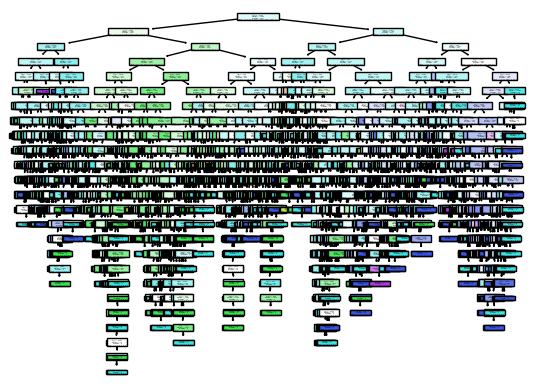

In [12]:
tree.plot_tree(model_combined,filled=True)